# Seleção de Características - Método Chi Squared
--------------------------------------------------------------------------------------------------------------------

##### Método do tipo FILTRO

In [11]:
# O Método Chi Squared seleciona as k características que possuem maiores pontuações calculadas pelo algoritmo

# Bibliotecas Necessárias

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualize
import matplotlib.pyplot as plt

# Seleção de características com testes estatístico univariado
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Carga da base de dados normalizada

In [2]:
# Carga da base original
dataset = pd.read_csv('dataset-normalizado.csv', header = 0)

# Reordena colocando a coluna is_approved no final do dataset
dataset = dataset[['school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'Medu_0',
       'Medu_1', 'Medu_2', 'Medu_3', 'Medu_4', 'Fedu_0', 'Fedu_1', 'Fedu_2',
       'Fedu_3', 'Fedu_4', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'is_approved']]


# Nome das características do dataset original
columns = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'traveltime', 'studytime', 'failures', 'schoolsup', 
            'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 
            'Dalc', 'Walc', 'health', 'absences', 'Medu_0', 'Medu_1', 'Medu_2', 'Medu_3', 'Medu_4', 'Fedu_0', 'Fedu_1', 
            'Fedu_2', 'Fedu_3', 'Fedu_4', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 
            'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 
            'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other']

In [3]:
print("Rows: {}".format(len(dataset)))
print("Columns: {}" .format(len(dataset.columns)))

dataset.head()

Rows: 649
Columns: 52


,school,sex,age,address,famsize,Pstatus,traveltime,studytime,failures,schoolsup,...,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,is_approved
0,0.0,0.0,0.428571,0.0,0.0,0.0,0.333333,0.333333,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.285714,0.0,0.0,1.0,0.000000,0.333333,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,1.0,1.0,0.000000,0.333333,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.666667,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.142857,0.0,0.0,1.0,0.000000,0.333333,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# Aplicação da Seleção de Características
Seleciona as k_features com maiores scores

In [4]:
k_features = 20

In [5]:
# Gera o array com os valores do dataset importado
array = dataset.values


# Separa em atributos e classe
features = array[:, 0:51]
target = array[:, 51]


# Extração das k_features
test = SelectKBest(score_func = chi2, k = k_features)
fit = test.fit(features, target)


# Obtém as informações de score das caracteristicas
features_scores = fit.scores_


# Gera a tabela com as informações das características selecionadas
dataset_features = pd.DataFrame(columns, columns=['Feature'])
dataset_features['Score of Feature'] = features_scores


# Ordena o dataset_features pelo score
dataset_features = dataset_features.sort_values(by='Score of Feature', ascending=False)


# Gera a coluna com o id da coluna original
dataset_features['Id column'] = dataset_features.index


# Reinicia o número da linha
dataset_features.reset_index(drop=True, inplace=True)


# Seleciona as k_features com maior score
dataset_k_features = dataset_features.head(k_features).copy()


# Exibe as características selecionadas
print("Número de características selecionadas: {}" .format(fit.k))
dataset_k_features

Número de características selecionadas: 20


,Feature,Score of Feature,Id column
0,guardian_other,30.682566,50
1,failures,18.763876,8
2,guardian_mother,10.317434,49
3,age,8.594602,2
4,romantic,6.931003,16
5,Medu_2,5.733840,26
6,Mjob_teacher,3.884612,38
7,Fedu_0,3.540459,29
8,Fedu_2,3.504853,31
9,Dalc,3.487301,20


# Gera o dataset com as características selecionadas

In [6]:
# Obtém o nome das características selecionadas
array_features = dataset_k_features['Feature'].copy()


# Reduz o dataset para o número de características selecionadas
dataset_selected = fit.transform(features)  


# Converte o dataset_selected em um DataFrame
dataset_reduced = pd.DataFrame(dataset_selected, columns=[array_features])


# Adiciona a coluna is_approved
dataset_target = pd.DataFrame(target, columns=['is_approved'])
dataset_reduced['is_approved'] = dataset_target


# Exibe o dataset reduzido
print("Número de características selecionadas: {}" .format(fit.k))
dataset_reduced.head()

Número de características selecionadas: 20


Feature,guardian_other,failures,guardian_mother,age,romantic,Medu_2,Mjob_teacher,Fedu_0,Fedu_2,Dalc,...,Mjob_services,absences,higher,reason_course,Medu_0,Fjob_services,Fjob_teacher,traveltime,Fjob_other,is_approved
0,0.428571,0.333333,0.0,1.0,0.0,0.00,0.1250,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.285714,0.000000,0.0,1.0,0.0,0.00,0.0625,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.000000,0.000000,0.0,1.0,0.0,0.25,0.1875,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.000000,0.000000,0.0,1.0,1.0,0.00,0.0000,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.142857,0.000000,0.0,1.0,0.0,0.00,0.0000,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


# Descrição das características selecionadas
Abaixo contém todas as características ordenadas pelo seu score

In [7]:
print('Características ordenadas pelo Score')
dataset_features

Características ordenadas pelo Score


,Feature,Score of Feature,Id column
0,guardian_other,30.682566,50
1,failures,18.763876,8
2,guardian_mother,10.317434,49
3,age,8.594602,2
4,romantic,6.931003,16
5,Medu_2,5.733840,26
6,Mjob_teacher,3.884612,38
7,Fedu_0,3.540459,29
8,Fedu_2,3.504853,31
9,Dalc,3.487301,20


# Gráfico com o valor do score de cada característica

Text(0.5, 1.0, 'Importância de cada feature')

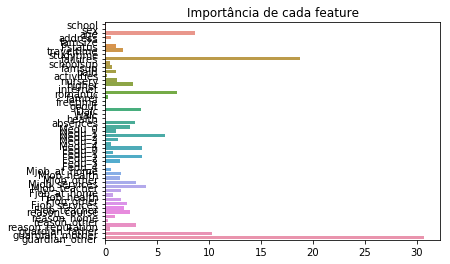

In [8]:
importances = pd.Series(data=features_scores, index=columns)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

# Exporta o dataset reduzido com os características selecionadas

In [9]:
dataset_reduced.to_csv("dataset-fs-chi-squared.csv", index=False)
print("Rows: {}".format(len(dataset_reduced)))
print("Columns: {}" .format(len(dataset_reduced.columns)))
dataset_reduced.head()

Rows: 649
Columns: 21


Feature,guardian_other,failures,guardian_mother,age,romantic,Medu_2,Mjob_teacher,Fedu_0,Fedu_2,Dalc,...,Mjob_services,absences,higher,reason_course,Medu_0,Fjob_services,Fjob_teacher,traveltime,Fjob_other,is_approved
0,0.428571,0.333333,0.0,1.0,0.0,0.00,0.1250,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.285714,0.000000,0.0,1.0,0.0,0.00,0.0625,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.000000,0.000000,0.0,1.0,0.0,0.25,0.1875,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.000000,0.000000,0.0,1.0,1.0,0.00,0.0000,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.142857,0.000000,0.0,1.0,0.0,0.00,0.0000,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
